In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# from config import weather_api_key

In [2]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bb6a6e4fe88c4d14807f40aac82698a0" 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"{len(city_data)} city records were retrived")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-uda
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | boddam
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | borogontsy
Processing Record 10 of Set 1 | pisco
Processing Record 11 of Set 1 | hobyo
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | labuhan
Processing Record 15 of Set 1 | plainview
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rovaniemi
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 

Processing Record 36 of Set 4 | cidreira
Processing Record 37 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | independence
Processing Record 40 of Set 4 | sterling
Processing Record 41 of Set 4 | ekuvukeni
Processing Record 42 of Set 4 | baruun-urt
Processing Record 43 of Set 4 | zhigansk
Processing Record 44 of Set 4 | avdon
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | cururupu
Processing Record 49 of Set 4 | northam
Processing Record 50 of Set 4 | san rafael del sur
Processing Record 1 of Set 5 | linxia
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 5 | tual
Processing Record 6 of Set 5 | half moon bay
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | mumbwa
Proce

Processing Record 29 of Set 8 | baker city
Processing Record 30 of Set 8 | syracuse
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | rio gallegos
Processing Record 33 of Set 8 | furano
Processing Record 34 of Set 8 | gravdal
Processing Record 35 of Set 8 | bahia blanca
Processing Record 36 of Set 8 | chikoy
City not found. Skipping...
Processing Record 37 of Set 8 | mazamari
Processing Record 38 of Set 8 | maldonado
Processing Record 39 of Set 8 | sayyan
Processing Record 40 of Set 8 | fairbanks
Processing Record 41 of Set 8 | galveston
Processing Record 42 of Set 8 | bhatkal
Processing Record 43 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 44 of Set 8 | garden city
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | urucara
Processing Record 47 of Set 8 | kayseri
Processing Record 48 of Set 8 | rockhampton
Processing Record 49 of Set 8 | oyama
Processing Record 50 of Set 8 | arcachon
Processing Record 1 of Set

Processing Record 17 of Set 12 | benguela
Processing Record 18 of Set 12 | jaragua
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | yala
Processing Record 23 of Set 12 | sembe
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | wahiawa
Processing Record 26 of Set 12 | tambovka
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | kavieng
Processing Record 29 of Set 12 | alekseyevsk
Processing Record 30 of Set 12 | tilichiki
Processing Record 31 of Set 12 | bac lieu
Processing Record 32 of Set 12 | qaqortoq
Processing Record 33 of Set 12 | hammonton
Processing Record 34 of Set 12 | vao
Processing Record 35 of Set 12 | inirida
Processing Record 36 of Set 12 | gizo
Processing Record 37 of Set 12 | wampusirpi
City not found. Skipping...
Processing Record 38 of Set 12 | neryungri
Processing Record 39

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Uda,54.1742,103.0304,59.90,74,100,3.80,RU,2021-06-04 19:15:51
1,Mar Del Plata,-38.0023,-57.5575,62.10,67,0,1.99,AR,2021-06-04 19:15:44
2,Butaritari,3.0707,172.7902,82.44,67,83,3.11,KI,2021-06-04 19:15:51
3,Mataura,-46.1927,168.8643,49.48,91,100,5.21,NZ,2021-06-04 19:15:52
4,Boddam,57.4667,-1.7833,62.44,82,93,14.03,GB,2021-06-04 19:15:52
5,Hithadhoo,-0.6000,73.0833,81.79,78,100,14.85,MV,2021-06-04 19:15:52
6,Naze,28.3667,129.4833,72.23,92,100,4.16,JP,2021-06-04 19:15:53
7,Borogontsy,62.6683,131.1683,57.33,60,58,5.68,RU,2021-06-04 19:15:53
8,Pisco,-13.7000,-76.2167,66.25,68,0,12.66,PE,2021-06-04 19:14:43
9,Hobyo,5.3505,48.5268,78.89,86,8,23.42,SO,2021-06-04 19:15:53


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Uda,RU,2021-06-04 19:15:51,54.1742,103.0304,59.90,74,100,3.80
1,Mar Del Plata,AR,2021-06-04 19:15:44,-38.0023,-57.5575,62.10,67,0,1.99
2,Butaritari,KI,2021-06-04 19:15:51,3.0707,172.7902,82.44,67,83,3.11
3,Mataura,NZ,2021-06-04 19:15:52,-46.1927,168.8643,49.48,91,100,5.21
4,Boddam,GB,2021-06-04 19:15:52,57.4667,-1.7833,62.44,82,93,14.03
5,Hithadhoo,MV,2021-06-04 19:15:52,-0.6000,73.0833,81.79,78,100,14.85
6,Naze,JP,2021-06-04 19:15:53,28.3667,129.4833,72.23,92,100,4.16
7,Borogontsy,RU,2021-06-04 19:15:53,62.6683,131.1683,57.33,60,58,5.68
8,Pisco,PE,2021-06-04 19:14:43,-13.7000,-76.2167,66.25,68,0,12.66
9,Hobyo,SO,2021-06-04 19:15:53,5.3505,48.5268,78.89,86,8,23.42


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

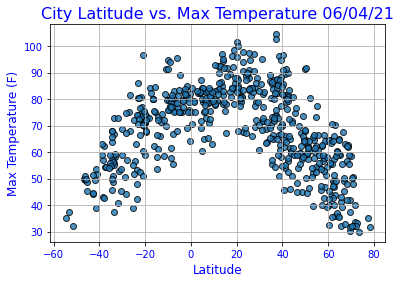

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"), fontsize=16, color = 'blue')
plt.ylabel("Max Temperature (F)", fontsize=12, color = 'blue')
plt.xlabel("Latitude", fontsize=12, color = 'blue')
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

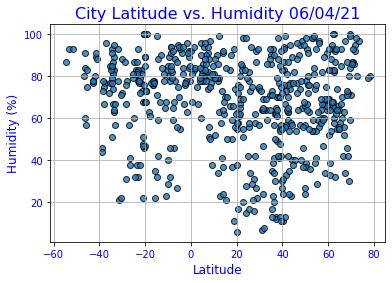

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"), fontsize=16, color = 'blue')
plt.ylabel("Humidity (%)", fontsize=12, color = 'blue')
plt.xlabel("Latitude", fontsize=12, color = 'blue')
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

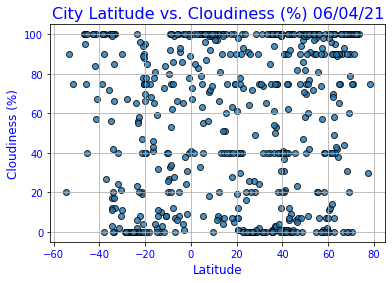

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"), fontsize=16, color = 'blue')
plt.ylabel("Cloudiness (%)", fontsize=12, color = 'blue')
plt.xlabel("Latitude", fontsize=12, color = 'blue')
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

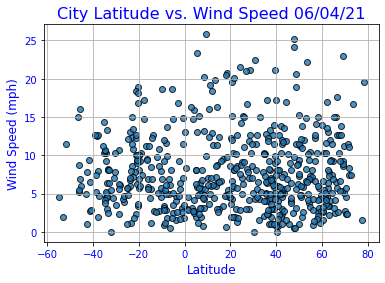

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"), fontsize=16, color = 'blue')
plt.ylabel("Wind Speed (mph)", fontsize=12, color = 'blue')
plt.xlabel("Latitude", fontsize=12, color = 'blue')
plt.xticks(color="blue")
plt.yticks(color="blue")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.xticks(color="blue")
    plt.yticks(color="blue")
    # Annotate the text for the line equation.
    plt.title(f"{title}", fontsize=12, color = 'blue')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude', color="blue")
    plt.ylabel(y_label, color="blue")
    plt.savefig(f"weather_data/{title}.png")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

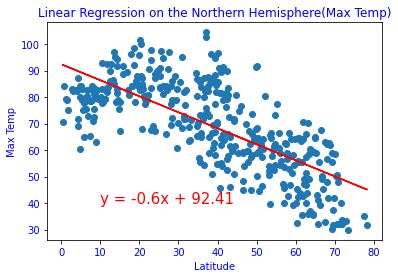

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere(Max Temp)', 'Max Temp',(10,40))

In [22]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,5), round(std_err,3))

(-0.605, 92.41, 0.52502, 0.0, 0.029)

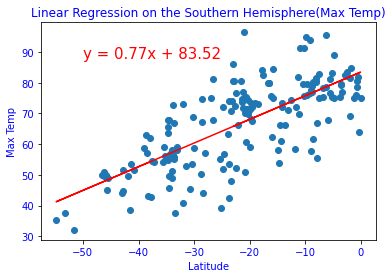

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere(Max Temp)', 'Max Temp',(-50,88))

In [24]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
(round(slope,3), round(intercept,3), round(r_value**2,3), round(p_value,3), round(std_err,3))

(0.772, 83.52, 0.543, 0.0, 0.053)

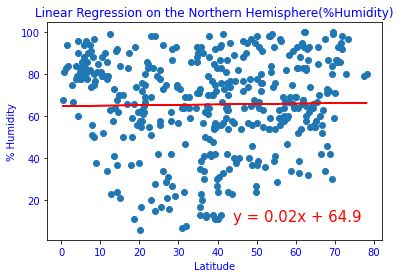

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere(%Humidity)', '% Humidity',(44,10))

In [41]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,3), round(std_err,3))

(0.02, 64.899, 0.00031, 0.729, 0.057)

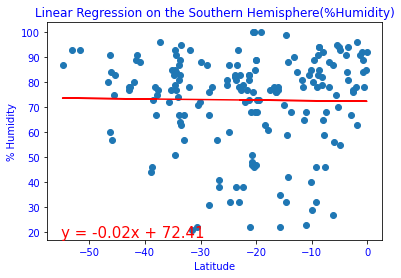

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere(%Humidity)', '% Humidity',(-55,18))

In [42]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,3), round(std_err,3))

(-0.023, 72.407, 0.00026, 0.829, 0.108)

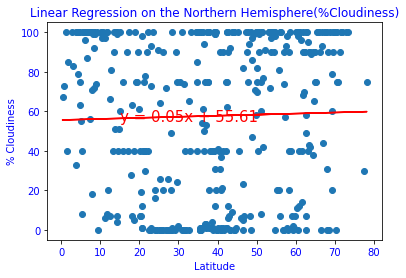

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere(%Cloudiness)', '% Cloudiness',(15,55))

In [44]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,5), round(std_err,3))

(0.054, 55.61, 0.00074, 0.59038, 0.1)

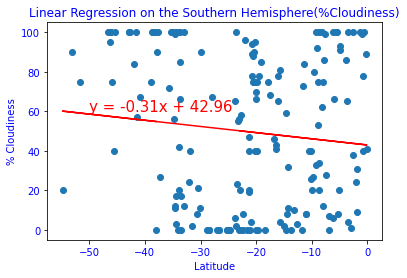

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere(%Cloudiness)', '% Cloudiness',(-50,60))

In [45]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,5), round(std_err,3))

(-0.313, 42.96, 0.01153, 0.15258, 0.218)

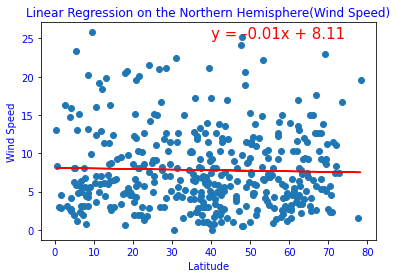

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere(Wind Speed)', 'Wind Speed',(40,25))

In [46]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,5), round(std_err,3))

(-0.008, 8.109, 0.00086, 0.56261, 0.013)

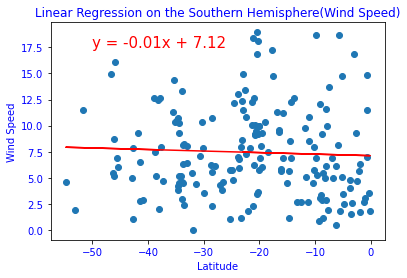

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere(Wind Speed)', 'Wind Speed',(-50,17.5))
                        

In [47]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
(round(slope,3), round(intercept,3), round(r_value**2,5), round(p_value,5), round(std_err,3))

(-0.015, 7.118, 0.00204, 0.54802, 0.024)